<h1> <center> Data Mining, Machine Learning and Deep Learning <br> 
 Mandatory Assignment 1 
</center> </h1> 

Group Members:
> **Mark Bjerregaard** <br>
> **Brynjar Orri Brim** <br>
> **Thor Møldrup**

<h2> Question 1: ML Assignment </h2>
<h3> Pt 1: Download Forest Fires dataset </h3>

In [2]:
#Import libraries
import pandas as pd
import urllib
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Form dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFires.csv')
display(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<h2> Pt 1.1: EDA (Exploratory Data Analysis)</h2>
<h3> Process: </h3>
1. Get data description <br>
2. Explore data, identify types, locate missing values <br>

In [4]:
#Download guest names to dictionary and filter out unnecessary information using regex 
url = "https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFiresColumns.txt"
file = urllib. request. urlopen(url)
expl_text = []

#iterate list of txt rows
for line in file: 
    decoded_line = line.decode("utf-8")
    expl_text.append(decoded_line)


#use regex to populate dictionary, using collon as seperator
expl_dict = {}
for line in expl_text[4:]:
    
    try:
        key, val = re.search("(^\w+)\:\s(.*)",line).group(1, 2)
    except:
        continue
    expl_dict[key]  = val

print("columns and explantions")
for key in expl_dict:
    print( key,":", expl_dict[key])

columns and explantions
X : x-axis spatial coordinate within the Montesinho park map: 1 to 9
Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9
month : month of the year: "jan" to "dec" 
day : day of the week: "mon" to "sun"
FFMC : FFMC index from the FWI system: 18.7 to 96.20
DMC : DMC index from the FWI system: 1.1 to 291.3 
DC : DC index from the FWI system: 7.9 to 860.6 
ISI : ISI index from the FWI system: 0.0 to 56.10
temp : temperature in Celsius degrees: 2.2 to 33.30
RH : relative humidity in %: 15.0 to 100
wind : wind speed in km/h: 0.40 to 9.40 
rain : outside rain in mm/m2 : 0.0 to 6.4 
area : the burned area of the forest (in ha): 0.00 to 1090.84 


We now have an overview of what the columns signify, as well as data ranges. <br>
A quick search reveals the FIWI codes are indexes derived from imformation such as temperature, humidity, rain etc. <br>
Now lets look at types, non-null counts and a summary of the data

In [5]:
#Exploring pandas dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


We can now see the dataset contains
- 13 columns
- 517 rows
- 0 null values <br> <br>
From the above tables we can gather that: <br><br>
- Month and Day columns are of the object type (a handy pandas datatype that can contain many different contents beside strings). We will modify these to integers for analysis purposes <br>
- The data seems unequally distributed which we will sort out later as part of the data cleaning before we start to cluster

<h2> Pt 1.2: Analysis - clustering</h2>
<h3> Process: </h3>
1. Data cleaning <br>
> Remove X, Y axis as we are not including geolocation in analysis <br>
> Convert months and days to integers <br>
2. Initial analysis <br>
> look for correlations and interresting relationships <br>
3. Select relevant columns and scale with transformer <br>
4. Perform clustering and display results <br>

In [6]:
#Dropping X, Y columns
plot_col_drop = ['X','Y']
clean_df = df.drop(plot_col_drop,axis=1)

#Convert months and daysto integers 
months = {'month':{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}
days = {'day':{"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}}
clean_df.replace(months,inplace = True)
clean_df.replace(days,inplace = True)

Having cleaned the data we can now start exploring <br>
To look for relationships we arrange the features in a pairplot

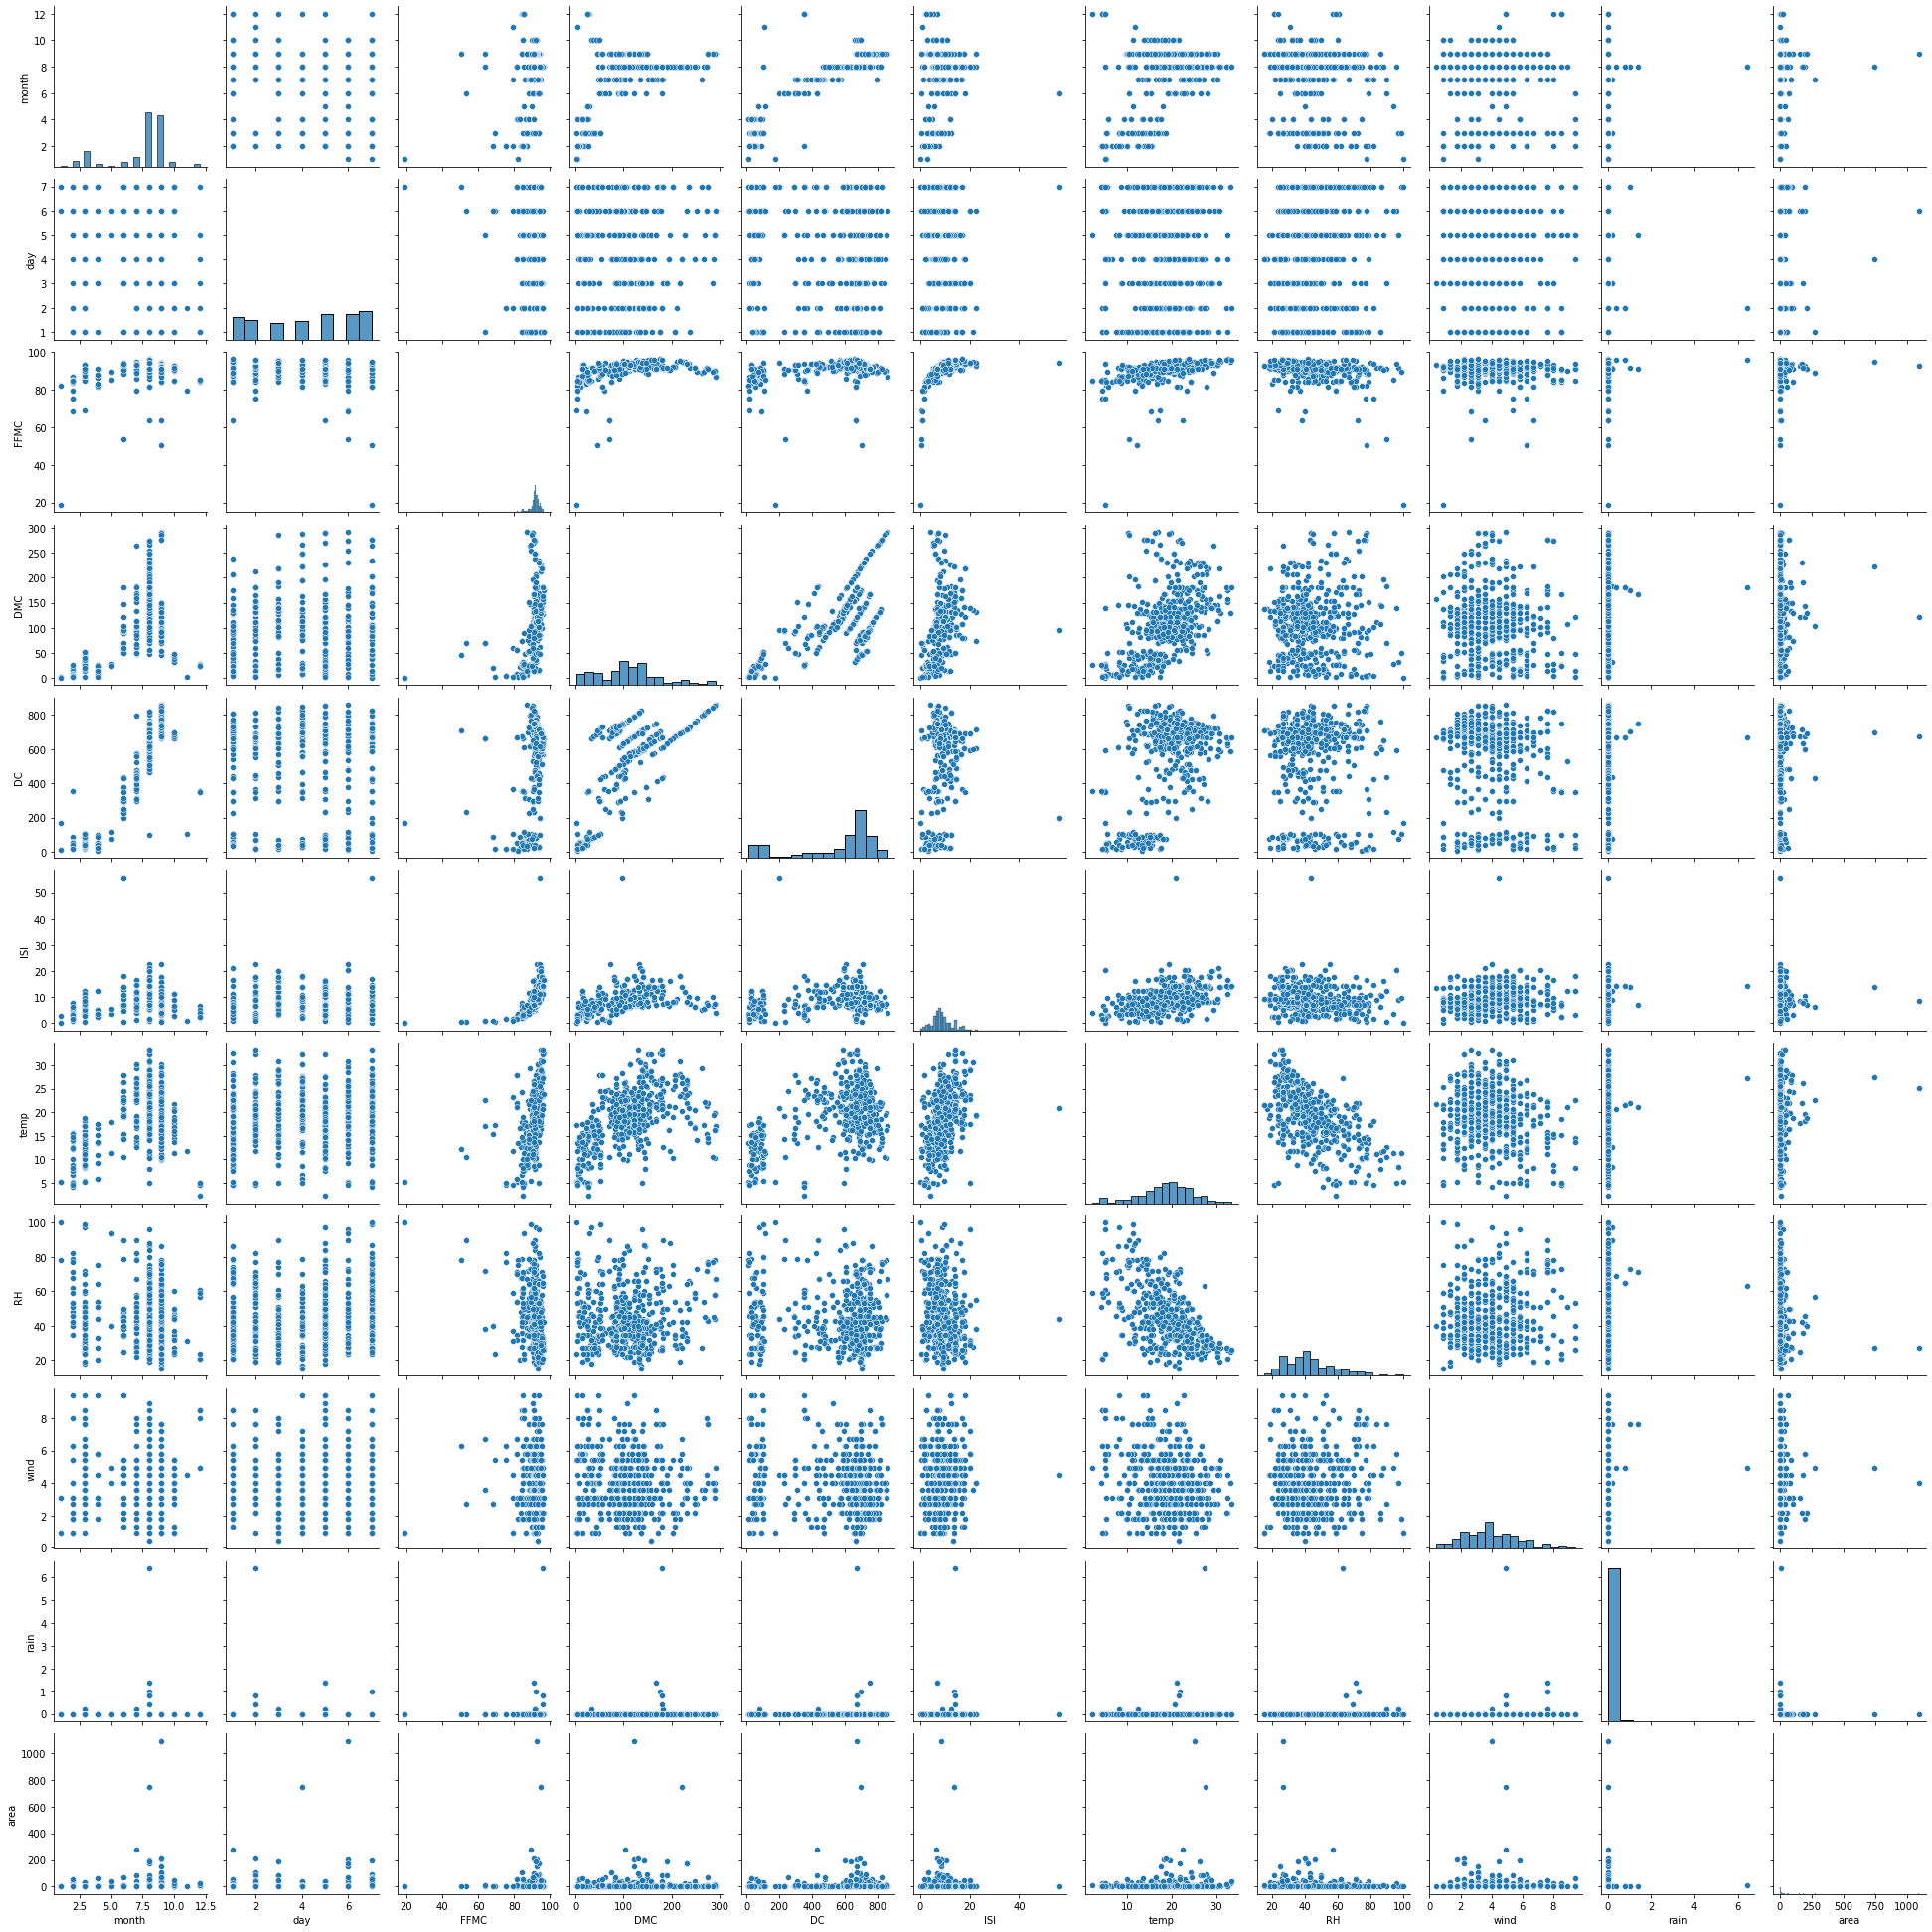

In [7]:
#pairplot
sns.pairplot(clean_df)

From the above plot it seems we can indentify quite a lot of related features in our dataset <br>
To move forward we decide to: <br>
- Focus on analysing conditions affecting the likelihood and area of fires
- Avoid including related fields (such as DC/DMC)
- Disregard obvious relationships such as forest fires and seasonality

From the pairplot we see interresting clusters in the relationships between:
- DC
- RH
- temp
- wind 

Lets examine them closer

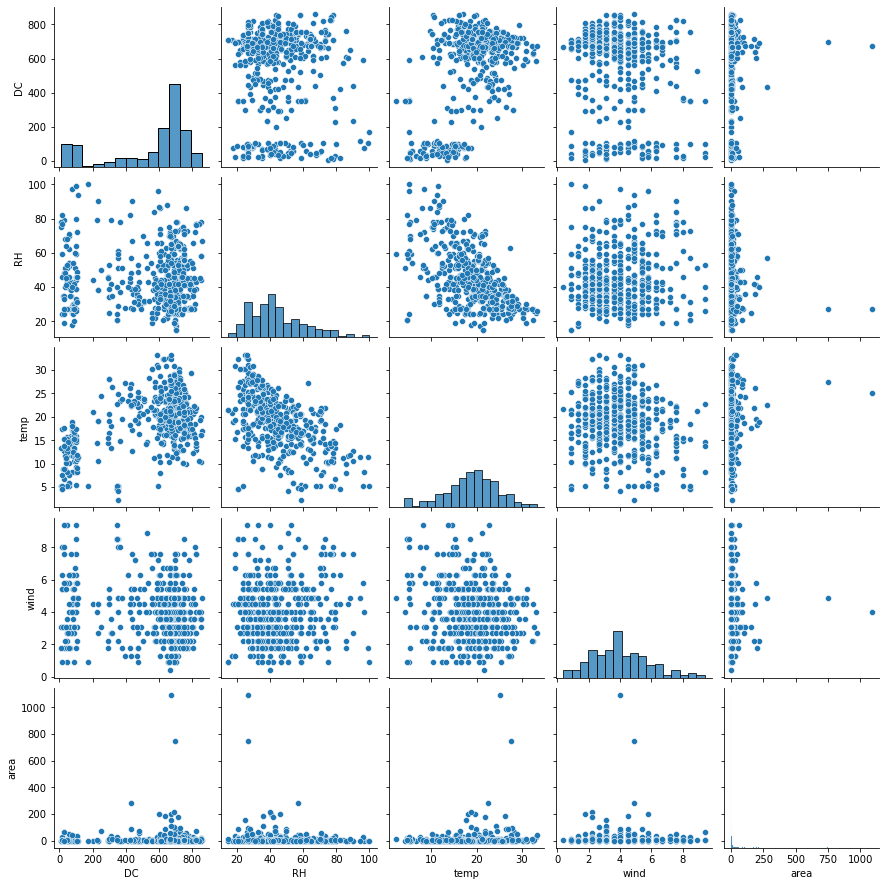

In [8]:
interesting_cols = ['DC','RH','temp','wind','area']
new_df = clean_df[interesting_cols]

sns.pairplot(new_df)


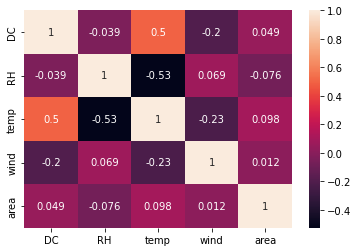

In [9]:
#Correlation
plt.figure()
sns.heatmap(new_df.corr(), annot=True)
plt.show()



We indeed see some interresting relationships and nice clusters. Other insights are: 
- Area seems to have extreme outliers
- DC is skewed to the left 
- RH has a long tail distribution

Doing a bit of research we find
- DC (Drought code) is moisture in deep organic layers, an indicator of long periods of hot weather with no rain for a significant period. This seems promising
- RH (Relative Humidity) is the humidity relative to temperature, also promising as it is a good indication for current conditions

Combining these two features (DC & RH) we should get a good picture of both current and prior conditions that might indicate **higher likelihood of forrest fires and their size** <br>
We choose not to focus on temperature as this indicator is a bit too obvious as an indicator of forrest fires, as well as DC being derived from temperature, hence the .5 correlation <br> <br>

Having chosen our columns we can now start building our pipeline and choosing our model. For this we create a pipeline to
- Transform area with log + 1 with a custom transformer (+ 1 so 0 values will remain 0)
- Scale with MinMax scale

In [10]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Select columns
cols = ['RH', 'DC', 'area']

#assign chosen columns to X 
X = new_df.loc[:,cols]

#custom log1p Transformer
class Log1pTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        Xlog = np.log(X + 1).to_numpy() 
        return Xlog

#Assign custom transformer to column transformer
area_transform = ColumnTransformer(
                transformers=[('log1p', Log1pTransformer(), ['area'])], remainder='passthrough')


#Pipeline with Standardscaler
pipe = Pipeline(steps=[
        ('log1p',area_transform),
        ('scaler',StandardScaler())
        ])
X_scaled_StdSc = pipe.fit_transform(X)

X_scaled_StdSc = pd.DataFrame(X_scaled_StdSc, columns = cols[::-1])
print("Scaled output Data")
display(X_scaled_StdSc)


Scaled output Data


,area,DC,RH
0,-0.795247,0.411724,-1.830477
1,-0.795247,-0.692456,0.488891
2,-0.795247,-0.692456,0.560715
3,-0.795247,3.233519,-1.898266
4,-0.795247,3.356206,-1.798600
...,...,...,...
512,0.641225,-0.753800,0.474768
513,2.076875,1.638592,0.474768
514,0.992873,1.577248,0.474768
515,-0.795247,-0.140366,0.269382


Having cleaned the data we can now use kmeans to categorize our data <br>
Note we use kmeans instead of DBSCAN as our data seems to have quite a lot of overlap which DBSCAN does not handle as well as kmean <br>

From experimentation we can find the configuration of n-clusters to see what fits our model the best

Text(0.5, 0.92, 'Forest Fire clusters')

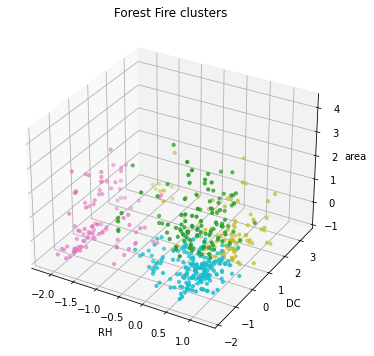

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import ipympl

X_scaled = X_scaled_StdSc.copy()

#Defining our model
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=800,
    random_state=0)

#Assigning colors for our 3D plot
colors = ['tab:cyan', 'tab:olive', 'tab:green', 'tab:pink', 'tab:brown', 'tab:purple', 'tab:red', 'tab:green']

#predicting categories and plotting 3D model
X_scaled['cluster'] = kmeans.fit_predict(X_scaled)
X_scaled['c'] = X_scaled.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_scaled.RH, X_scaled.DC, X_scaled.area, c = X_scaled.c, s=10)
ax.set_xlabel('RH')
ax.set_ylabel('DC')
ax.set_zlabel('area')
ax.set_title("Forest Fire clusters")

<h3> Findings </h3>

From the graph we see that clusters:
- big fires seem to converge around 0.5 RH and -1 Drought Code
- Fires seems to be frequent around -2 RH
- Size of fires seem to be determined by low Drought Code (indicating low moisture content in deep organic layers) 

<h2> Question 2: Principal component Analysis </h2>
<h3> Pt 1 - Download Olivetti faces dataset </h3>

In [204]:
#Importing libraries
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#Fetching dataset
faces, target = fetch_olivetti_faces(return_X_y=True)
print("number of images", faces.shape[0])
print("number of features", faces.shape[1])

#function for resizing data array to 64 x 64 pixel array
def Image_array(array):
    return np.reshape(array, (-1,64,64))

#Function for resizing pixel array back to data array
def Data_array(array):
    return np.reshape(array,(-1,4096))

faces_img = Image_array(faces)
print("pixel array shape",faces_img.shape)

print(np.reshape(faces_img,(-1,4096)).shape)


number of images 400
number of features 4096
pixel array shape (400, 64, 64)
(400, 4096)


In [205]:
# Visualize images
# Code copied from ML course, class05_solutions 
def Image_display(images, target, title=""):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    fig.suptitle(title,fontsize=30,c="k", y=0.35)
    # Plotting every 10'th image (1 of every individual)
    for i in range(40):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(images[i*10], cmap=plt.cm.gray, interpolation='nearest')
    
        # label the image with the target value
        ax.text(2, 10, str(target[i*10]), c="k", style="oblique", fontweight="bold")
    
Image_display(faces_img,target, title="Original Images")

<h3> Pt 2.1.a - Perform dimensionality reduction on Olivetti faces dataset using PCA </h3>

number of features in reduced form: 260
Reconstruction error as RMSE: 0.7887709


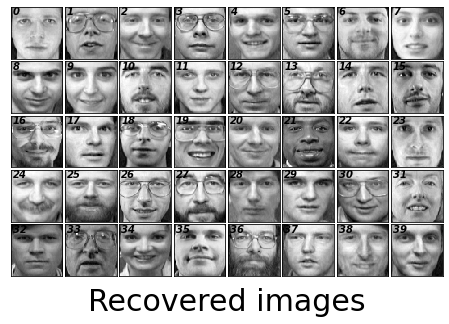

In [ ]:
from numpy import linalg as LA
#Performing PCA, preserving 99% variance
pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(faces)
print("number of features in reduced form: %s" 
    % str(pca.explained_variance_ratio_.shape[0]))

#reconstructing images
X_recovered = pca.inverse_transform(X_reduced)

#Calculating reconstruction error using RMSE
def RMSE(original,reconstructed):
    loss = np.sum((original-reconstructed) ** 2,axis=1).mean()
    return loss

print("Reconstruction error as RMSE: %s"
    % str(RMSE(faces,X_recovered)))

#Displaying recovered image
recovered_images = np.reshape(X_recovered,(-1,64,64))
Image_display(image_array(X_recovered),target, title="Recovered images")


<h3> Pt 2.1.b - Add noise to images and evaluate reconstruction error </h3>

Reconstruction error of flipped images as RMSE: 225.21176
Reconstruction error of salt and pepper noised images as RMSE: 122.198586
Reconstruction error of dark images as RMSE: 231.16568


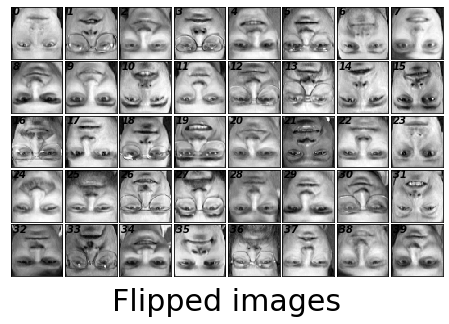

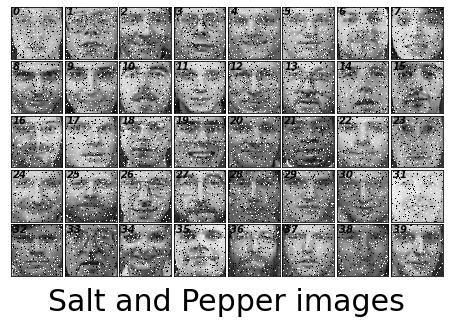

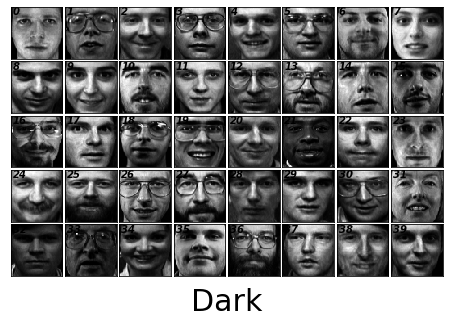

In [ ]:
from skimage.transform import rotate
from skimage.util import random_noise
from skimage import exposure, io

#Function for adding noise
def Noise(images,noise="flip", return_array = "Images"):
    images = image_array(images).copy()

    #image flip (rotate 180 degrees)
    if noise == "flip":
        for i in range(images.shape[0]):
            images[i] = rotate(images[i], 180)

    #Salt and pepper noise add
    if noise == "s&p":
        for i in range(images.shape[0]):
            images[i] = random_noise(images[i], mode="s&p",amount=0.1)

    #Gamma adjustment
    if noise == "dark":
        for i in range(images.shape[0]):
            images[i] = exposure.rescale_intensity(images[i], out_range=(0.00001,1))
            images[i] = exposure.adjust_gamma(images[i],gamma=2.5)

    #output format
    if return_array == "Images":
        return images
    else:
        return Data_array(images)

flip_img = Noise(X_recovered, noise="flip")
snp_img = Noise(X_recovered, noise="s&p")
dark_img = Noise(X_recovered, noise="dark")

#Display output
Data_array(flip_img)
Image_display(flip_img,target, title="Flipped images")
print("Reconstruction error of flipped images as RMSE: %s"
    % str(RMSE(faces,Data_array(flip_img))))

Image_display(snp_img,target, title="Salt and Pepper images")
print("Reconstruction error of salt and pepper noised images as RMSE: %s"
    % str(RMSE(faces,Data_array(snp_img))))
    
Image_display(dark_img,target, title="Dark")
print("Reconstruction error of dark images as RMSE: %s"
    % str(RMSE(faces,Data_array(dark_img))))

<h3> Pt 2.1.c - Plot images side by side </h3>

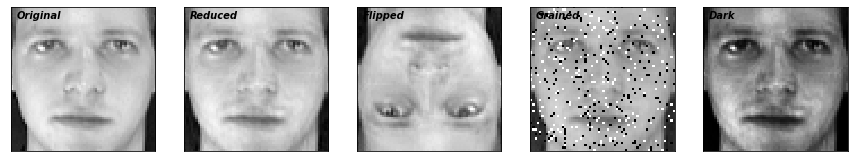

In [ ]:
im_list = [faces_img, recovered_images,flip_img,snp_img,dark_img]
titles = ['Original','Reduced','Flipped','Grained','Dark']

#Display figure
fig = plt.figure(figsize=(15,15))

#Adding subplots and text 
for i in range(5):
    ax = fig.add_subplot(1,5, i+1, xticks=[],yticks=[])
    ax.imshow(im_list[i][0], cmap=plt.cm.gray,interpolation='nearest')
    ax.text(2,5, titles[i], c="k", style="oblique", fontweight="bold")

<h3> Pt 2.2 - Singular Value Decomposition</h3> 

In [2]:
#Import necessary libraries for the assignment
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

# Create matrix A

A = [[0, 1, 1], [math.sqrt(2), 2, 0], [0, 1, 1]]


A = np.array(A)


# Transpose the matrix

A_t = A.transpose()


# Multiply A with A_t
AA = np.dot(A_t, A)


# Create lambda matrix
from sympy import symbols, solve

# Create a variable l which stands for lambda

l = symbols('l')

lambda_matrix = [[l, 0, 0], [0, l, 0], [0, 0, l]]

lambda_matrix = np.array(lambda_matrix)


# Solving the equation det(AA - lambda*I) = 0
det_matrix = AA-lambda_matrix

equation = det_matrix[0][0]*(det_matrix[1][1]*det_matrix[2][2]-det_matrix[2][1]*det_matrix[1][2])-det_matrix[1][0]*(det_matrix[0][1]*det_matrix[2][2]-det_matrix[2][1]*det_matrix[0][2])

#Solve equation = 0

result = solve(equation)

print('Lambda values are: ', result)

# The singular values are the square root of the eigenvalues:

print('Singular values: ')
for i in result:
    print(math.sqrt(i))

Lambda values are:  [0.0, 2.00000000000000, 8.00000000000000]
Singular values: 
0.0
1.4142135623730951
2.8284271247461903
